In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Functions

In [2]:
def predict(s, w, b):
    pred = np.dot(s, w) + b
    pred = [1 if pred>0 else 0]
    return pred

In [3]:
def training(xtrain, ytrain, weights, bias, learn_rate):
    train_pred = []
    for i in range(xtrain.shape[0]):
        s_pred = predict(xtrain.iloc[i], weights, bias)
        error = ytrain.iloc[i]-s_pred
        weights += learn_rate*error*xtrain.iloc[i]
        bias += learn_rate*error
    train_pred = np.dot(xtrain, weights)+bias
    mse = (1/xtrain.shape[0])*(sum((ytrain-train_pred)**2))
    train_pred[train_pred>0] = 1
    train_pred[train_pred<=0] = 0
    tr_error = 1-accuracy_score(ytrain, train_pred)
    tr_mat = confusion_matrix(ytrain, train_pred)
    return weights, bias, mse, tr_error, tr_mat

In [4]:
def train_val(xtrain, ytrain, xval, yval, learn_rate):
    mse_error = []
    train_error = []
    val_error = []
    weights = np.zeros(xtrain.shape[1])
    bias = 0
    t= True
    num_iter = 0
    while t:
        num_iter += 1
        old_weights = np.copy(weights)
        old_bias = np.copy(bias)
        weights, bias, mse, tr_error, train_mat = training(xtrain, ytrain, weights, bias, learn_rate)
        mse_error.append(mse)
        train_error.append(tr_error)
        val_pred = []
        for j in range(xval.shape[0]):
            val_pred.append(predict(xval.iloc[j], weights, bias))
        v_error = 1-accuracy_score(yval, val_pred)
        val_error.append(v_error)
        if num_iter==4000 or (all(weights==old_weights) and bias==old_bias):
            t = False
            val_mat = confusion_matrix(yval, val_pred)
    return weights, bias, mse_error, train_error, val_error, num_iter, train_mat, val_mat

# Preparing the Data

In [5]:
col_names = []
for c in range(60):
    col_names.append('x%d'%c)
col_names.append('label')

In [6]:
data = pd.read_csv('F://Uni/992/Neural Networks/Homeworks/HW01/shuffled.csv',names=col_names)

In [7]:
x_train = data.loc[:round(0.7*data.shape[0]),:].drop(columns='label')
y_train = data.loc[:round(0.7*data.shape[0]),'label']
x_val = data.loc[round(0.7*data.shape[0]):int(0.8*data.shape[0]),:].drop(columns='label')
y_val = data.loc[round(0.7*data.shape[0]):int(0.8*data.shape[0]),'label']
x_test = data.loc[round(0.8*data.shape[0]):,:].drop(columns='label')
y_test = data.loc[round(0.8*data.shape[0]):,'label']

print('Dataset Shapes:\n',x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

Dataset Shapes:
 (147, 60) (147,) (21, 60) (21,) (42, 60) (42,)


# Perceptron

In [8]:
learning_rate = 1
weights, bias, mse_error, train_error, val_error, num_iter, train_mat, val_mat = train_val(x_train, y_train, x_val, y_val, learning_rate)

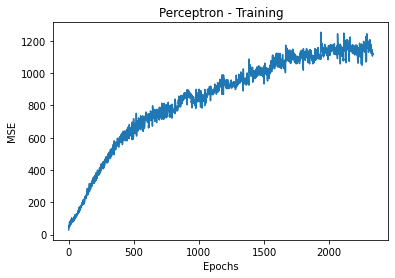

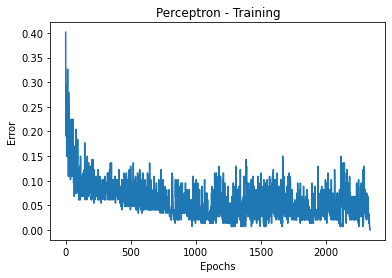

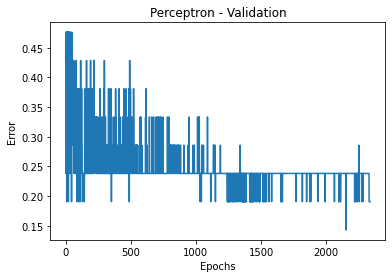

In [9]:
plt.plot(np.arange(1,num_iter+1), mse_error)
plt.title('Perceptron - Training')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

plt.plot(np.arange(1,num_iter+1), train_error)
plt.title('Perceptron - Training')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

plt.plot(np.arange(1,num_iter+1), val_error)
plt.title('Perceptron - Validation')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [10]:
print('Number of Iterations: ', num_iter)
print('Perceptron MSE Error: ', mse_error[-1])
print('Perceptron Train Error:\n', train_error[-1])
print('Perceptron Train Confusion Matrix:\n',train_mat)
print('Perceptron Validation Error:\n', val_error[-1])
print('Perceptron Validation Confusion Matrix:\n', val_mat)
#Test
test_pred = []
for sample in range(x_test.shape[0]):
    test_pred.append(predict(x_test.iloc[sample], weights, bias))

test_error = 1-accuracy_score(y_test, test_pred)
test_mat = confusion_matrix(y_test, test_pred)
print('Perceptron Test Error:\n', test_error)
print('Perceptron Test Confusion Matrix:\n', test_mat)

Number of Iterations:  2336
Perceptron MSE Error:  1122.2908705920277
Perceptron Train Error:
 0.0
Perceptron Train Confusion Matrix:
 [[68  0]
 [ 0 79]]
Perceptron Validation Error:
 0.19047619047619047
Perceptron Validation Confusion Matrix:
 [[9 1]
 [3 8]]
Perceptron Test Error:
 0.38095238095238093
Perceptron Test Confusion Matrix:
 [[15  6]
 [10 11]]
